## Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [3]:
# y = m * x + b

#Some random noise added
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)  

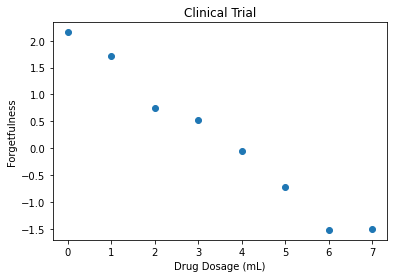

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
print(m)

tensor([0.9000], requires_grad=True)


In [6]:
b = torch.tensor([0.1]).requires_grad_()
print(b)

tensor([0.1000], requires_grad=True)


In [7]:
#Define our regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

In [8]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


In [9]:
#Mean square error
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [10]:
#Cost function
C = mse(yhat, y)
print(C)

tensor(20.6798, grad_fn=<DivBackward0>)


### Auto-diff to calculate gradient C

In [13]:
C.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [14]:
m.grad

tensor([36.8716])

In [15]:
b.grad

tensor([6.1618])

## Gradient Descent Algorithm